In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# CSVファイルからデータを読み込む
csv_path = 'drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data3.csv'
df = pd.read_csv(csv_path)
# 特徴とターゲットの分割
feature_columns = [
    '年齢', '高血圧', '心臓病', '血糖値', 'BMI', '性別_Female', '性別_Male',
    '既婚_No', '既婚_Yes', '職業_Govt_job', '職業_Never_worked', '職業_Private',
    '職業_Self-employed', '住居地域_Rural', '住居地域_Urban',
    '喫煙_Unknown', '喫煙_formerly smoked', '喫煙_never smoked', '喫煙_smokes'
]
X = df[feature_columns].values
y = df['脳卒中'].values

# SMOTEとRandomUnderSamplerを使用したPipelineを作成
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# データをリサンプリングして分割
X_resampled, y_resampled = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# トレーニングデータとテストデータのサンプル数を表示
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 6312
Number of testing samples: 1578


In [ ]:
# 決定木モデルのインスタンス生成
clf = DecisionTreeClassifier(random_state=42)

# モデルの訓練
clf.fit(X_train, y_train)

# テストデータに対する予測
y_pred = clf.predict(X_test)

# 性能評価
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[753  33]
 [ 20 772]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       786
         1.0       0.96      0.97      0.97       792

    accuracy                           0.97      1578
   macro avg       0.97      0.97      0.97      1578
weighted avg       0.97      0.97      0.97      1578



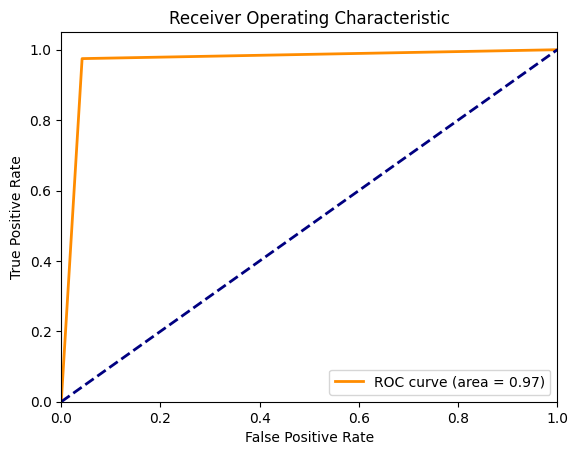

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# テストデータに対する予測確率を取得
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# FPR, TPR, しきい値を取得
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUCスコアを計算
roc_auc = auc(fpr, tpr)

# ROC曲線をプロット
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


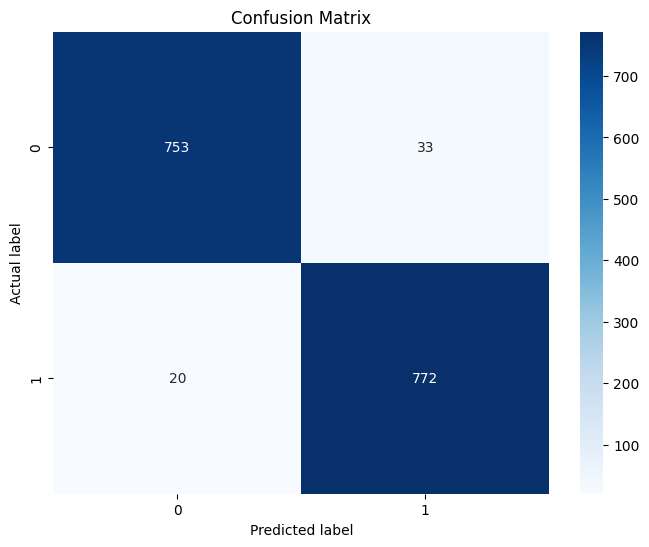

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 21931 (\N{CJK UNIFIED IDEOGRAPH-55AB}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 29017 (\N{CJK UNIFIED IDEOGRAPH-7159}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 34880 (\N{CJK UNIFIED IDEOGRAPH-8840}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/pytho

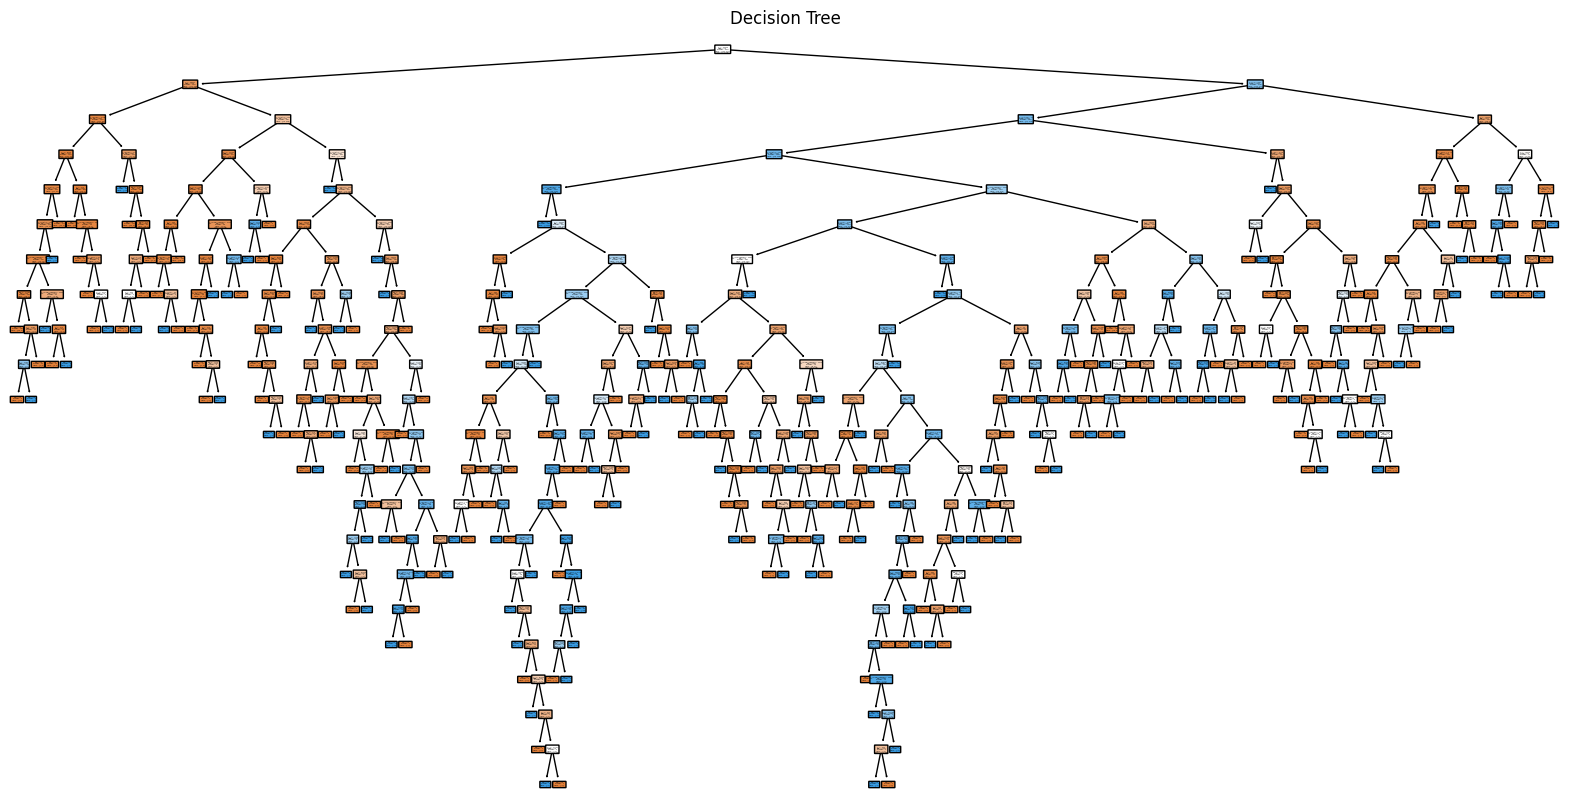

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 混同行列の計算
cm = confusion_matrix(y_test, y_pred)

# 混同行列のヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

from sklearn.tree import plot_tree

# 決定木のプロット
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_columns, class_names=['No Stroke', 'Stroke'], rounded=True)
plt.title('Decision Tree')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# 訓練データに対する予測
y_train_pred = clf.predict(X_train)

# テストデータに対する予測
y_test_pred = clf.predict(X_test)

# 訓練データとテストデータでの精度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 0.9664131812420785


In [ ]:
# import pandas as pd
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.tree import DecisionTreeClassifier

# # データをリサンプリングして分割
# X_resampled, y_resampled = pipeline.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# # プルーニングとクロスバリデーションを含む決定木モデルの設定
# parameters = {'max_depth': range(3, 20), 'min_samples_leaf': range(1, 10)}
# clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5)

# # クロスバリデーションによるモデルの訓練
# clf.fit(X_train, y_train)

# # 最適なパラメータの表示
# print("Best parameters:", clf.best_params_)

# # 交差検証結果の表示
# cv_results = cross_val_score(clf, X_train, y_train, cv=5)
# print("Cross-validation accuracy scores:", cv_results)
# print("Mean cross-validation accuracy:", cv_results.mean())

import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# データのリサンプリングと分割
X_resampled, y_resampled = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# プルーニングとクロスバリデーションを含む決定木モデルの設定
parameters = {'max_depth': range(3, 20), 'min_samples_leaf': range(1, 10)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=5)

# クロスバリデーションによるモデルの訓練
clf.fit(X_train, y_train)

# 最適なパラメータの表示
print("Best parameters:", clf.best_params_)

# 最適なパラメータを用いて最終モデルを訓練
best_clf = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'], min_samples_leaf=clf.best_params_['min_samples_leaf'], random_state=42)
best_clf.fit(X_train, y_train)

# テストデータに対する評価
y_pred = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': 16, 'min_samples_leaf': 4}
[[755  31]
 [ 32 760]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       786
         1.0       0.96      0.96      0.96       792

    accuracy                           0.96      1578
   macro avg       0.96      0.96      0.96      1578
weighted avg       0.96      0.96      0.96      1578



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# 最適なパラメータを用いた決定木モデルのインスタンス生成
best_clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)

# リサンプリングした訓練データでモデルを訓練
best_clf.fit(X_train, y_train)

# テストデータに対する予測
y_pred = best_clf.predict(X_test)

# # 混合行列の計算
# cm = confusion_matrix(y_test, y_pred)
# print(cm)


In [ ]:
# 性能評価
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[765  21]
 [ 31 761]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       786
         1.0       0.97      0.96      0.97       792

    accuracy                           0.97      1578
   macro avg       0.97      0.97      0.97      1578
weighted avg       0.97      0.97      0.97      1578



In [ ]:
from sklearn.metrics import accuracy_score

# 訓練データに対する予測
y_train_pred = clf.predict(X_train)

# テストデータに対する予測
y_test_pred = clf.predict(X_test)

# 訓練データとテストデータでの精度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.9828897338403042
Test Accuracy: 0.9600760456273765


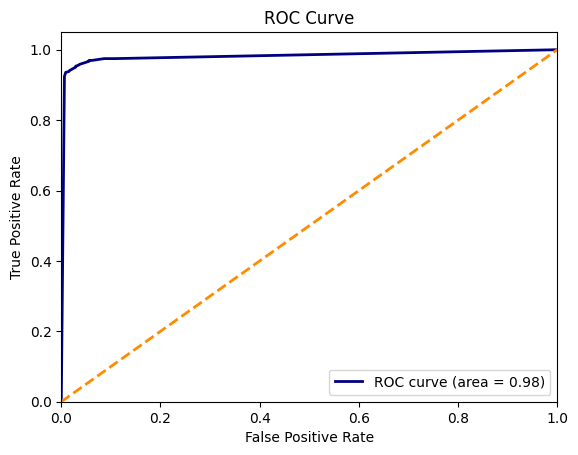

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# テストデータに対する予測確率を取得
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# FPR, TPR, しきい値を取得
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUCスコアを計算
roc_auc = auc(fpr, tpr)

# ROC曲線をプロット
plt.figure()
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
